<img src="download.png" alt= "LAB" width="600" height="300">

In [2]:
from sympy import *

Задание 1 с sympy

In [3]:
x, y = symbols('x y')
expr = 2*tan(x)+1
display(expr)
integral = Integral(expr, (x, -1, 2))
display(integral)
display(integral.doit())

2*tan(x) + 1

Integral(2*tan(x) + 1, (x, -1, 2))

nan

In [4]:
x, y = symbols('x y')
expr = x+y
display(expr)
integral = Integral(Integral(expr, (y, x**2, x)), (x, 0, 1))
display(integral)
display(integral.doit())

x + y

Integral(x + y, (y, x**2, x), (x, 0, 1))

3/20

Задание 1 с scipy

In [5]:
import numpy as np
import scipy.integrate as integrate

# integrate.quad – определенный интеграл, РАСХОДИТСЯ, несобственный интеграл с разрывами на интервале при пи/2
result = integrate.quad(lambda x: 2*tan(x)+1, -1, 2) 
print(result)      

area = integrate.dblquad(  
    lambda x,y:x+y,  
    0, 1,  # Пределы внешнего (y) интеграла
    lambda x:x**2, lambda x:x  # Пределы внутреннего(x) интеграла
)
print(area[0]) 

(4.422578885159041, 0.2969189037450981)
0.14999999999999997


C:\Users\mikko\AppData\Local\Temp\ipykernel_18712\2287188496.py:5: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result = integrate.quad(lambda x: 2*tan(x)+1, -1, 2)


<img src="download.png" alt= "LAB" width="600" height="300">

Задание 2 - задача Коши!

Здесь мы выбираем метод интегрирования "RK45" и ограничиваем шаг интегрирования максимальной величиной max_step. Также мы устанавливаем относительную (rtol) и абсолютную (atol) точности, чтобы гарантировать, что погрешность решения не превысит 0.01.

y(x) = x^2 + 1  -- result!, so y(3) = 10

10.000000018036047
10.000222222222874
TIME  0.0010001659393310547
YES
0.00022220418682650234


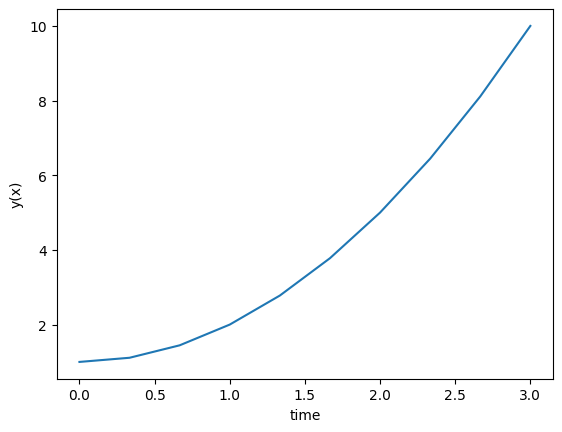

In [13]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import time

def f(y, x):
    return 2*x # Правая часть (ПЧ) дифференциального уравнения 

start = time.time()
y0 = 1.0  # Начальное условие
k_step = 1000  # Количество шагов разбиения отрезка для численного интегрирования
x_output = np.linspace(0, 3, k_step)  
y_result = odeint(f, y0, x_output, rtol=0.01, atol=0.01)
y_result = y_result[:, 0]
print(y_result[-1])

# 100 times less
k_step = 10
x_output = np.linspace(0, 3, k_step)
y_result_2 = odeint(f, y0, x_output, rtol=0.01, atol=0.01)
y_result_2 = y_result_2[:, 0]
print(y_result_2[-1])

end = time.time() - start

print("TIME ", end)

if abs(y_result_2[-1] - y_result[-1]) < 0.01:
    print("YES")
    print(abs(y_result_2[-1] - y_result[-1]))
else:
    print("No")

plt.plot(x_output,y_result_2)
plt.xlabel('time')
plt.ylabel('y(x)')
plt.show()

<img src="download.png" alt= "LAB" width="600" height="300">

Задание 3

Линейная и кубическая интерполяции - это методы аппроксимации функций, которые используются для оценки значений функции в точках, которые находятся между ее известными значениями.

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[0.         0.09070257 2.17101606 2.01146631 1.01064175 2.78008909
 2.98606266 1.65514396 3.11633044 3.75098725 2.24933241 3.3254761
 4.36967998 2.84299282 3.4707516  4.86101497]


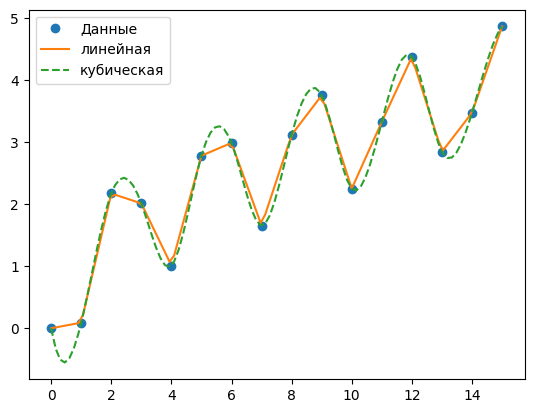

In [41]:
from scipy.interpolate import interp1d

x = np.arange(16)
# x = np.linspace(0, 15, num=16, endpoint=True)  # Точки для интерполяции
print(x)
y = -np.sin(2*x) + np.sqrt(x)  # Значения функции в точках x
print(y)

# endpoint=True - also included
x_new = np.linspace(0, 15, num=100, endpoint=True)  # Новые точки x
fun_linear = interp1d(x, y, kind='linear')  # Вызываем линейную интерполяцию
fun_cubic = interp1d(x, y, kind='cubic')  # Вызываем кубическую интерполяцию

plt.plot(x, y, 'o', x_new, fun_linear(x_new), '-', x_new, fun_cubic(x_new), '--')
plt.legend(['Данные', 'линейная', 'кубическая'], loc='best')
plt.show()

<img src="download.png" alt= "LAB" width="600" height="300">

Задание 4

Для заданной случайной величины X, которая представляет количество выпавших очков на игральном кубике, мы имеем дискретное равномерное распределение с параметрами a=1 и b=6, где a - это наименьшее возможное значение X, а b - наибольшее возможное значение X.

.median() использует интерполяционный алгоритм для нахождения значения медианы. Для равномерного распределения с нечетным числом возможных значений, как в данном случае, интерполяция между средними двумя значениями дает медиану, равную (a + b) / 2, т.е. в данном случае 3.0.

Лучше посчитать вот так: М(X) = (a + b) / 2

In [65]:
import scipy.stats

xk = np.linspace(1, 6, num=6, endpoint=True)  # Точки для интерполяции
print(xk)

# Задаем распределение (дискретное СВ)
probabilities = np.ones_like(xk) / len(xk)
print(probabilities)
my_rv = scipy.stats.rv_discrete(values=(xk, probabilities))

print('Математическое ожидание:', my_rv.mean())   
print('Медиана:', my_rv.median()) 
print('Median handle:', (my_rv.a+my_rv.b)/2)
print(f'Дисперсия: {my_rv.var():.2f}')


[1. 2. 3. 4. 5. 6.]
[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
Математическое ожидание: 3.5
Медиана: 3.0
Median handle: 3.5
Дисперсия: 2.92


pmf(k) — значение дискретной плотности в точке  k (Probability Mass Function)
<br>
cdf(x) — значение функции распределения в точке  x (Cumulative Distribution Function)

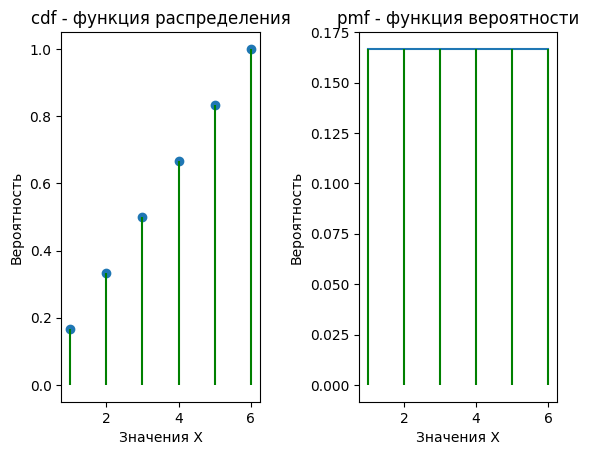

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
plt.subplots_adjust(wspace=0.5)
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot(xk, my_rv.cdf(xk), 'o') # график функции распределения д.с.в.
ax1.vlines(xk, 0, my_rv.cdf(xk), colors='green')
ax1.set_title('cdf - функция распределения')
ax1.set_xlabel('Значения X')
ax1.set_ylabel('Вероятность')

ax2.plot(xk, my_rv.pmf(xk)) # график закона распредления д.с.в. (плотности вероятностей)
ax2.vlines(xk, 0, my_rv.pmf(xk), colors='green')
ax2.set_title('pmf - функция вероятности')
ax2.set_xlabel('Значения X')
ax2.set_ylabel('Вероятность')

plt.show()

<img src="download.png" alt= "LAB" width="600" height="300">

Задание 5

In [81]:
def show_expr(func, expr, *args, **kwargs):
    display(expr)
    display(func(expr, *args, **kwargs))

In [90]:
x, y, z = symbols('x y z')
# В форме СЛАУ:
show_expr(linsolve, [x-y+z-2, 2*x-y+z-3, 3*x-3*y+z-0], (x, y, z))

[x - y + z - 2, 2*x - y + z - 3, 3*x - 3*y + z]

{(1, 2, 3)}

In [106]:
# symbolic equations - Eq, not = or ==
eq1 = Eq(x-y+z,2)
eq2 = Eq(2*x-y+z,3)
eq3 = Eq(3*x-3*y+z, 0)

display(eq1, eq2, eq3)

eqs = [eq1, eq2, eq3]
res = linsolve(eqs, (x, y, z))
# display(res)
print(f'x: {res.args[0][0]}')
print(f'y: {res.args[0][1]}')
print(f'z: {res.args[0][2]}')

x - y + z = 2

2⋅x - y + z = 3

3⋅x - 3⋅y + z = 0

x: 1
y: 2
z: 3
